In [197]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer

path = 'C:/Users/matys/Downloads/workshop_zadania_2/workshop_zadania/'
file_with_matrix = 'matrix.txt'

df = pd.read_csv(path+file_with_matrix, header=None , sep=' ')

df.columns = ['1_column', '2_column', '3_column']
df.head(4)

values = df.to_numpy()


Only for test

In [198]:
def slicing(matrix):

    cols = []
    
    for j in range(matrix.shape[1]):
        cols += [matrix[:, j]]

    return cols

In [199]:
matrix_cols = slicing(values)
t1, t2 = matrix_cols[0][0:2]
h = np.log(t2 / t1)
h


-0.0007320254723775872

In [200]:
def applying_to_columns(f, axis, values):
     return np.apply_along_axis(f, axis, values)

In [201]:
def transforming_values(matrix):

    new_matrix = []
    n = matrix.shape[0]

    for i in range(n):

        try:

            if i != n:
                r_i = np.log(matrix[i + 1] / matrix[i])

                new_matrix.append(r_i)

        except IndexError:
            continue

        
    return new_matrix

    

In [202]:
values_after_transformation = applying_to_columns(transforming_values, 0, values)
values_after_transformation[0:10]

array([[-0.00073203,  0.00196447,  0.00151177],
       [-0.0006289 , -0.00114446,  0.00485502],
       [ 0.0014921 , -0.00071147, -0.00376107],
       [ 0.00015691,  0.0022888 ,  0.00541372],
       [-0.00104059,  0.0073927 , -0.00096121],
       [ 0.00131614, -0.00162243, -0.00323788],
       [-0.00111839,  0.00382754, -0.00022249],
       [-0.00013901,  0.00296943, -0.00379354],
       [-0.0018639 ,  0.00402091,  0.00316833],
       [ 0.00104987, -0.00075638, -0.00024466]])

In [203]:
function = lambda v: applying_to_columns(transforming_values, 0, v)

transformer = FunctionTransformer(function)
data_transformed_with_transformer = transformer.transform(values)

data_transformed_with_transformer[0:10]

array([[-0.00073203,  0.00196447,  0.00151177],
       [-0.0006289 , -0.00114446,  0.00485502],
       [ 0.0014921 , -0.00071147, -0.00376107],
       [ 0.00015691,  0.0022888 ,  0.00541372],
       [-0.00104059,  0.0073927 , -0.00096121],
       [ 0.00131614, -0.00162243, -0.00323788],
       [-0.00111839,  0.00382754, -0.00022249],
       [-0.00013901,  0.00296943, -0.00379354],
       [-0.0018639 ,  0.00402091,  0.00316833],
       [ 0.00104987, -0.00075638, -0.00024466]])

In [204]:
import matplotlib.pyplot as plt

def visualizing_company(values, tranformed_values, number_of_column):

    font_dict = {'size': 12}
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
    plt.subplots_adjust( 
                    hspace=0.3)

    x_values = [x for x in range(values.shape[0])]

    axs[0].plot(x_values, values[:, number_of_column], color='orange', label='before transformation')
    axs[0].set_ylabel('Price', font_dict)
    axs[0].set_xlabel('Number of entry sample', font_dict)
    axs[0].legend(fontsize=12)

    axs[1].plot(x_values[:len(x_values) - 1], tranformed_values[:, number_of_column], label='after transformation', color='#9370DB')
    axs[1].set_xlabel('Number of entry sample', font_dict)
    axs[1].legend(fontsize=12)

    fig.suptitle(f'\n{number_of_column + 1}. Company', fontsize=20)

    plt.show()

First company

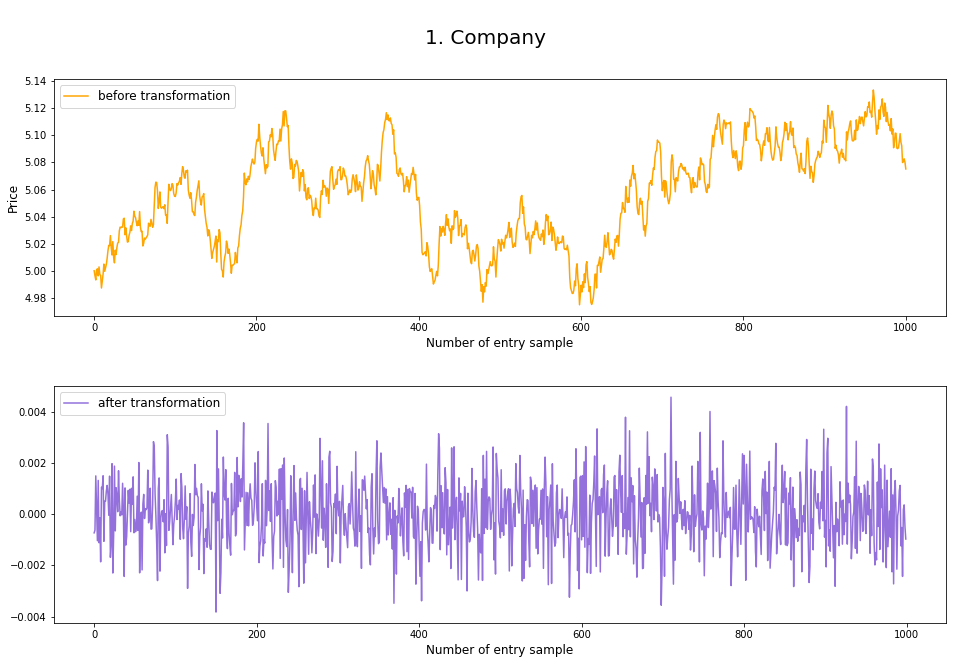

In [205]:
visualizing_company(values, data_transformed_with_transformer, 0)

Second company

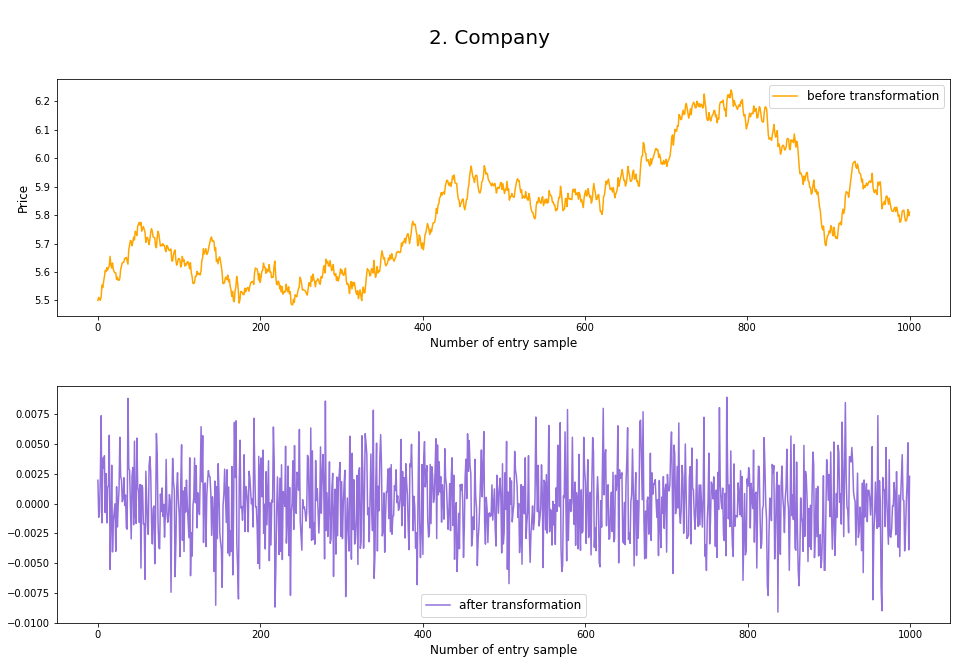

In [206]:
visualizing_company(values, data_transformed_with_transformer, 1)

Third company

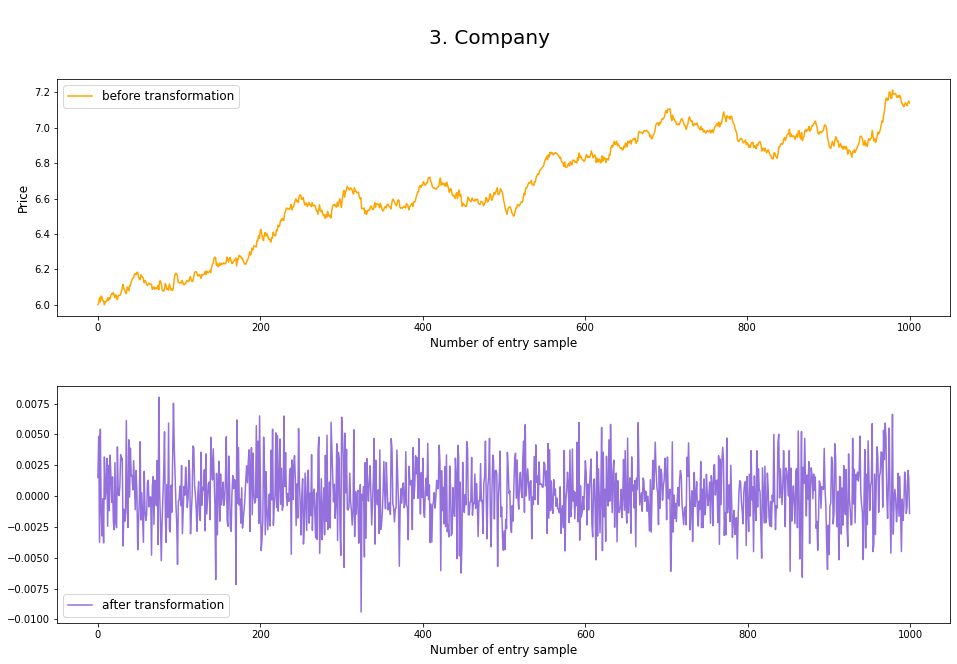

In [207]:
visualizing_company(values, data_transformed_with_transformer, 2)